# Dataframes

#### Tenis de Mesa

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
tenis = pd.read_csv('../Raw_Datasets/Trabajado/pingpong.csv', sep=';')
tenis

,# Distrito,Junta de Distrito,Tipo,Instalación deportiva,Dirección,Tenis de mesa
0,1,Centro,IDB,Parque Atenas,"Pº Virgen del Puerto, 3B c/v Pº de Plasencia",1
1,1,Centro,IDB,Parque la Cornisa,C/ Rosario (detrás de San Francisco El Grande),1
2,1,Centro,IDB,Plaza Arturo Barea,Plaza Arturo Barea,1
3,2,Arganzuela,IDB,Juan de Mariana,"C/ Juan de Mariana, 8C (PO)",2
4,3,Retiro,IDB,Cerro Negro,"C/ Cerro Negro, 5",1
...,...,...,...,...,...,...
71,19,Vicálvaro,IDB,Cordel de Pavones,"C/ Cordel de Pavones, 9",3
72,19,Vicálvaro,IDB,Parque de la Vicalvarada,"C/ Vereda del Pinar, 1",1
73,20,San Blas - Canillejas,CDM,San Blas,"C/ Arcos del Jalón, 59",3
74,20,San Blas - Canillejas,IDB,Electra,"C/ Cronos, 65",1


In [4]:
tenis = tenis.drop(columns='Tipo')

In [5]:
import geocoder

def geocode_address(address):
    location = geocoder.osm(address)
    if location.ok:
        return location.lat, location.lng
    else:
        return None, None

tenis['Latitud'], tenis['Longitud'] = zip(*tenis['Dirección'].apply(geocode_address))

In [6]:
tenis

,# Distrito,Junta de Distrito,Instalación deportiva,Dirección,Tenis de mesa,Latitud,Longitud
0,1,Centro,Parque Atenas,"Pº Virgen del Puerto, 3B c/v Pº de Plasencia",1,NaN,NaN
1,1,Centro,Parque la Cornisa,C/ Rosario (detrás de San Francisco El Grande),1,NaN,NaN
2,1,Centro,Plaza Arturo Barea,Plaza Arturo Barea,1,40.408352,-3.703593
3,2,Arganzuela,Juan de Mariana,"C/ Juan de Mariana, 8C (PO)",2,NaN,NaN
4,3,Retiro,Cerro Negro,"C/ Cerro Negro, 5",1,10.091385,-85.561019
...,...,...,...,...,...,...,...
71,19,Vicálvaro,Cordel de Pavones,"C/ Cordel de Pavones, 9",3,40.401115,-3.619120
72,19,Vicálvaro,Parque de la Vicalvarada,"C/ Vereda del Pinar, 1",1,NaN,NaN
73,20,San Blas - Canillejas,San Blas,"C/ Arcos del Jalón, 59",3,37.620924,-0.989776
74,20,San Blas - Canillejas,Electra,"C/ Cronos, 65",1,38.366803,-0.442317


## Sendas

In [161]:
import geopandas as gpd

In [162]:
sendas = gpd.read_file('../Raw_Datasets/Trabajado/spacmsendasnaturaleza.json')

In [163]:
sendas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            224 non-null    object  
 1   CDID          224 non-null    int64   
 2   CD_SENDA      95 non-null     object  
 3   DS_NOMBRE     224 non-null    object  
 4   CD_CATEGORIA  224 non-null    object  
 5   DS_CATEGORIA  224 non-null    object  
 6   DS_INICIO     224 non-null    object  
 7   DS_FINAL      221 non-null    object  
 8   DS_LONGITUD   224 non-null    object  
 9   CD_SUBCAT     68 non-null     object  
 10  DS_SUBCAT     68 non-null     object  
 11  DS_ENP        122 non-null    object  
 12  COLOR_FILL    224 non-null    object  
 13  COLOR_STROKE  224 non-null    object  
 14  geometry      224 non-null    geometry
dtypes: geometry(1), int64(1), object(13)
memory usage: 26.4+ KB


In [164]:
sendas = sendas.drop(columns=['COLOR_FILL', 'COLOR_STROKE', 'CD_SUBCAT', 'DS_SUBCAT', 'CD_SENDA', 'id'])

In [165]:
sendas.head(3)

,CDID,DS_NOMBRE,CD_CATEGORIA,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,DS_ENP,geometry
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (426199.309 4528647.264, 426203.466..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (425284.437 4526628.865, 425313.908..."
2,140,Senda Soto Bayona: Tramo adaptado,ENP,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,Parque Regional del Sureste,"LINESTRING (451150.280 4443398.392, 451146.138..."


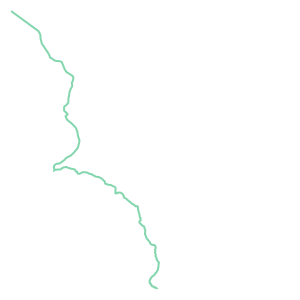

In [166]:
sendas['geometry'][1]

In [167]:
sendas['geometry']

0      LINESTRING (426199.309 4528647.264, 426203.466...
1      LINESTRING (425284.437 4526628.865, 425313.908...
2      LINESTRING (451150.280 4443398.392, 451146.138...
3      LINESTRING (456487.575 4463670.374, 456475.007...
4      LINESTRING (456687.875 4463375.235, 456705.337...
5      LINESTRING (451752.090 4451785.762, 451762.012...
6      LINESTRING (456522.265 4463539.150, 456522.363...
7      LINESTRING (425288.895 4526625.325, 425283.515...
8      LINESTRING (431521.312 4537584.599, 431497.897...
9      LINESTRING (426351.485 4527876.248, 426361.010...
10     LINESTRING (464003.758 4443393.360, 464002.757...
11     LINESTRING (457938.787 4472811.600, 457947.518...
12     LINESTRING (456162.786 4466065.698, 456181.042...
13     LINESTRING (451154.804 4443306.837, 451160.095...
14     LINESTRING (414301.364 4490321.110, 414295.637...
15     LINESTRING (413929.956 4490540.453, 413933.138...
16     LINESTRING (413876.112 4490492.512, 413854.681...
17     MULTILINESTRING ((419565

In [168]:
import utm

def utm_to_latlon(coords_list):
    return [utm.to_latlon(easting, northing, 30, "T") for easting, northing in coords_list]

def convert_to_latlon(geometry):
    if geometry.type == "LineString":
        return utm_to_latlon(geometry.coords)
    elif geometry.type == "MultiLineString":
        result = []
        for line_string in geometry.geoms:
            result.extend(utm_to_latlon(line_string.coords))
        return result
    else:
        raise ValueError(f"Tipo de geometría no soportada: {geometry.type}")

sendas["lat_lon_list"] = sendas["geometry"].apply(convert_to_latlon)

C:\Users\ciruz\AppData\Local\Temp\ipykernel_13444\2676304331.py:7: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "LineString":
C:\Users\ciruz\AppData\Local\Temp\ipykernel_13444\2676304331.py:9: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == "MultiLineString":


In [169]:
sendas['lat_lon_list'][0]

[(40.905598698613964, -3.8762650172744095),
 (40.905684658127626, -3.876216794548245),
 (40.90607483403453, -3.8750352854270984),
 (40.90634667981597, -3.8744829540559764),
 (40.90655202289854, -3.874143555734919),
 (40.90673157710159, -3.873996249777089),
 (40.906918512648886, -3.873945256080874),
 (40.90706449331332, -3.873947176823138),
 (40.90756257586244, -3.87392610607897),
 (40.90772732579657, -3.8738874347628323),
 (40.90793128808846, -3.8735523277812103),
 (40.90804717552781, -3.8732438157960547),
 (40.90812948905294, -3.8730845335899238),
 (40.90813913595174, -3.8728815338461096),
 (40.90811105013767, -3.872629566267713),
 (40.90805445287098, -3.8722817295992957),
 (40.9080005697375, -3.871795592849578),
 (40.90801037855406, -3.871443863720431),
 (40.908087101214946, -3.871180993883108),
 (40.908326649352674, -3.8706068243615994),
 (40.9085017985342, -3.8699676624091213),
 (40.90861093587457, -3.86947730509904),
 (40.90864511811299, -3.868708000114443),
 (40.90867540184789, -

In [170]:
def convert_tuples_to_lists(tup_list):
    return [list(tup) for tup in tup_list]

# Aplicar la función a la columna 'lat_lon_list' usando apply y lambda
sendas['lat_lon_list'] = sendas['lat_lon_list'].apply(lambda x: convert_tuples_to_lists(x))
sendas['lat_lon_list'][0]

[[40.905598698613964, -3.8762650172744095],
 [40.905684658127626, -3.876216794548245],
 [40.90607483403453, -3.8750352854270984],
 [40.90634667981597, -3.8744829540559764],
 [40.90655202289854, -3.874143555734919],
 [40.90673157710159, -3.873996249777089],
 [40.906918512648886, -3.873945256080874],
 [40.90706449331332, -3.873947176823138],
 [40.90756257586244, -3.87392610607897],
 [40.90772732579657, -3.8738874347628323],
 [40.90793128808846, -3.8735523277812103],
 [40.90804717552781, -3.8732438157960547],
 [40.90812948905294, -3.8730845335899238],
 [40.90813913595174, -3.8728815338461096],
 [40.90811105013767, -3.872629566267713],
 [40.90805445287098, -3.8722817295992957],
 [40.9080005697375, -3.871795592849578],
 [40.90801037855406, -3.871443863720431],
 [40.908087101214946, -3.871180993883108],
 [40.908326649352674, -3.8706068243615994],
 [40.9085017985342, -3.8699676624091213],
 [40.90861093587457, -3.86947730509904],
 [40.90864511811299, -3.868708000114443],
 [40.90867540184789, -

In [171]:
sendas['lat_lon_list'][4]

[[40.3197791134375, -3.5097920954715267],
 [40.31959886372623, -3.509585203722439],
 [40.31941853135838, -3.5093969974954966],
 [40.31926280238282, -3.509034583820895],
 [40.319182442370355, -3.5087802764228426],
 [40.31916997449793, -3.5087398526862392],
 [40.31895092544456, -3.508140291378639],
 [40.318678241731675, -3.507540332319038],
 [40.31834612711535, -3.506630701070146],
 [40.31820192639688, -3.5060830956025306],
 [40.31816090034609, -3.5056530413206954],
 [40.318157462276446, -3.504802862129184],
 [40.318177458257054, -3.504317208876117],
 [40.31822648287206, -3.503733676366773],
 [40.31844378372635, -3.5030976734502084],
 [40.31853412421597, -3.502878797630843],
 [40.318653351925846, -3.5025947385508407],
 [40.318765286084904, -3.5023433229277354],
 [40.31890220721543, -3.5021014340238334],
 [40.31902102773555, -3.5019107936846288],
 [40.3191040327897, -3.501733901274384],
 [40.31917647327357, -3.501519560301283],
 [40.319209765717346, -3.501262888101616],
 [40.3192214228878

In [172]:
sendas.drop(columns='geometry', inplace=True)

In [173]:
sendas.head(2)

,CDID,DS_NOMBRE,CD_CATEGORIA,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,DS_ENP,lat_lon_list
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"[[40.905598698613964, -3.8762650172744095], [4..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"[[40.887335296390866, -3.8868835643175763], [4..."


In [174]:
sendas = sendas.drop(columns= ['CDID', 'CD_CATEGORIA', 'DS_ENP'])
sendas.head(5)

,DS_NOMBRE,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,lat_lon_list
0,Paseos por el Valle de El Paular. Camino de Ra...,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4..."
1,Paseos por el Valle de El Paular: Camino a la ...,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4..."
2,Senda Soto Bayona: Tramo adaptado,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"[[40.13950232543426, -3.5734478536309267], [40..."
3,Un paseo por El Campillo: el Agua,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"[[40.32242758620203, -3.5121696695195457], [40..."
4,Un paseo por El Campillo: el Agua. Tramo de se...,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"[[40.3197791134375, -3.5097920954715267], [40...."


In [175]:
sendas.drop(columns='DS_CATEGORIA', inplace=True)

In [176]:
sendas.lat_lon_list.iloc[221]

[[41.02060244504218, -3.4440823482548075],
 [41.02060368549644, -3.444082106811828],
 [41.0122936858988, -3.4448358262460967],
 [41.012331232014596, -3.444638071298299],
 [41.01236865175673, -3.444473936740977],
 [41.01239995338288, -3.444429315697401],
 [41.0124706693987, -3.4444372618394463],
 [41.012578101846636, -3.4444641344569384],
 [41.012742545355415, -3.4443830461032263],
 [41.01299477303207, -3.4442875956427743],
 [41.01309112820669, -3.444250883266142],
 [41.01329790634503, -3.4441999633432996],
 [41.01355888110852, -3.444037323623676],
 [41.013641201644404, -3.4439706261944636],
 [41.01378280728666, -3.4439416866492127],
 [41.01394753723426, -3.443785869952308],
 [41.014058602772245, -3.443603544819539],
 [41.014126830867724, -3.4435218096188387],
 [41.01421490064787, -3.4434327302373635],
 [41.014370710619296, -3.4433889387046612],
 [41.01445299036361, -3.443333449667674],
 [41.014629425757356, -3.443076835733708],
 [41.01483488235788, -3.442749602617985],
 [41.01516744032

In [177]:
# Función para detectar el encoding

import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        rawdata = file.read()
    result = chardet.detect(rawdata)
    return result['encoding']


In [178]:
sendas[['LATITUD', 'LONGITUD']] = sendas['lat_lon_list'].apply(lambda x: pd.Series(zip(*x)))
sendas.head(2)

,DS_NOMBRE,DS_INICIO,DS_FINAL,DS_LONGITUD,lat_lon_list,LATITUD,LONGITUD
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4...","(40.905598698613964, 40.905684658127626, 40.90...","(-3.8762650172744095, -3.876216794548245, -3.8..."
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4...","(40.887335296390866, 40.88714476891775, 40.885...","(-3.8868835643175763, -3.8865312002598196, -3...."


In [179]:
sendas.LATITUD[0]

(40.905598698613964,
 40.905684658127626,
 40.90607483403453,
 40.90634667981597,
 40.90655202289854,
 40.90673157710159,
 40.906918512648886,
 40.90706449331332,
 40.90756257586244,
 40.90772732579657,
 40.90793128808846,
 40.90804717552781,
 40.90812948905294,
 40.90813913595174,
 40.90811105013767,
 40.90805445287098,
 40.9080005697375,
 40.90801037855406,
 40.908087101214946,
 40.908326649352674,
 40.9085017985342,
 40.90861093587457,
 40.90864511811299,
 40.90867540184789,
 40.90864762323685,
 40.90869419709488,
 40.90870508467124,
 40.90874008337979,
 40.90877939118686,
 40.9088797598277,
 40.909053357548814,
 40.909192831164056,
 40.90943845622932,
 40.90974077094817,
 40.90995411461883,
 40.91034430325842,
 40.91059923275582,
 40.91084692993651,
 40.91110305373325,
 40.911189067091826,
 40.91151438867106,
 40.911816687531285,
 40.91218658149622,
 40.91237606004949,
 40.91250709482702,
 40.91263932426452,
 40.91284080601996,
 40.912915864330145,
 40.91311448128248,
 40.913135720

In [180]:
sendainicio = sendas.drop(columns= ['Latitud', 'Longitud'])

KeyError: "['Latitud', 'Longitud'] not found in axis"

In [ ]:
sendainicio[['Latitud', 'Longitud']] = df['lat_lon_list'].apply(lambda x: pd.Series(x[0]))

## Fuentes

In [ ]:
fuentes = pd.read_csv('../Raw_Datasets/Trabajado/Inventario Fuentes2023.csv', sep=';')
fuentes

,CODIGO,ZONA VERDE / \r\nVIA PUBLICA,DISTRITO,DIRECCION,COMPLEMENTO_DIRECCION,"COORD, X","COORD, Y",SISTEMA DE COORDENADAS,FECHA DATOS,longitud,latitud
0,FUE_01_0001,ZV,CENTRO,PLAZA COMENDADORAS,PLAZA COMENDADORAS,"439892,4997","4475419,798",ETRS89 / UTM Zona 30N,45013,-3.708600,40.427243
1,FUE_01_0002,ZV,CENTRO,JARDINES CONDE DUQUE,JARDINES CONDE DUQUE,"439766,5391","4475585,204",ETRS89 / UTM Zona 30N,45013,-3.710101,40.428724
2,FUE_01_0003,ZV,CENTRO,PLAZA DE LAS SALESAS,PLAZA DE LAS SALESAS,"441077,2599","4475077,763",ETRS89 / UTM Zona 30N,45013,-3.694603,40.424246
3,FUE_01_0004,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441281,789","4475192,9",ETRS89 / UTM Zona 30N,45013,-3.692202,40.425298
4,FUE_01_0005,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441199,3988","4475222,805",ETRS89 / UTM Zona 30N,45013,-3.693176,40.425562
...,...,...,...,...,...,...,...,...,...,...,...
2144,FUEP_21_0035,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448355,41","4478638,03",ETRS89 / UTM Zona 30N,45013,-3.609099,40.456803
2145,FUEP_21_0036,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448118,84","4478829,1",ETRS89 / UTM Zona 30N,45013,-3.611905,40.458510
2146,FUEP_21_0037,ZV,BARAJAS,JUAN CARLOS I,A.01 · PLAZA SUR,"448247,84","4478883,13",ETRS89 / UTM Zona 30N,45013,-3.610388,40.459004
2147,FUEP_21_12_0038,ZV,BARAJAS,JUAN CARLOS I,D.09 · TALUD RÍA,"448359,97","4478982,41",ETRS89 / UTM Zona 30N,45013,-3.609074,40.459906


In [ ]:
fuentes = fuentes.drop(columns=['CODIGO', 'SISTEMA DE COORDENADAS', 'FECHA DATOS', 'COORD, X', 'COORD, Y', 'COMPLEMENTO_DIRECCION', 'ZONA VERDE / \r\nVIA PUBLICA'])

In [ ]:
fuentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRITO   2149 non-null   object 
 1   DIRECCION  2149 non-null   object 
 2   longitud   2149 non-null   float64
 3   latitud    2149 non-null   float64
dtypes: float64(2), object(2)
memory usage: 67.3+ KB


In [ ]:
fuentes.rename()

,DISTRITO,DIRECCION,longitud,latitud
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562
...,...,...,...,...
2144,BARAJAS,JUAN CARLOS I,-3.609099,40.456803
2145,BARAJAS,JUAN CARLOS I,-3.611905,40.458510
2146,BARAJAS,JUAN CARLOS I,-3.610388,40.459004
2147,BARAJAS,JUAN CARLOS I,-3.609074,40.459906


## Centros de Salud

In [ ]:
centros = pd.read_csv('..\Raw_Datasets\Trabajado\centros_de_salud.csv', sep=',')
centros

,X,Y,TIPOCEN2,TIPOVIAL,NOMVIA,NUMERO,MUNICIPIO
0,-3.365999,40.481648,Centro de Salud Carmen Calzado,Calle,Carmen Calzado,14,Alcal1 de Henares
1,-3.350480,40.487732,Centro de Salud Juan de Austria,Avenida,Juan de Austria,19,Alcal1 de Henares
2,-3.393029,40.481640,Centro de Salud La Garena,Calle,Arturo Soria,10,Alcal1 de Henares
3,-3.368122,40.475056,Centro de Salud Luis Vives I y II,Calle,Luis Vives,16,Alcal1 de Henares
4,-3.357354,40.482162,Centro de Salud Manuel Merino,Calle,Manuel Merino,1,Alcal de Henares
...,...,...,...,...,...,...,...
261,-3.685277,40.192128,Centro de Salud Valdemoro,Calle,Parla,14,Valdemoro
262,-4.300194,40.274539,Centro de Salud Villa del Prado,Paseo,de la Estaciln,2,Villa del Prado
263,-4.001834,40.446805,Centro de Salud Villanueva de la Caaada,Calle,de las Eras de MVstoles,18,Villanueva de la Caoada
264,-3.275264,40.170269,Centro de Salud Villarejo de Salvanas,Calle,Hospital,7,Villarejo de Salvanls


In [ ]:
centros.MUNICIPIO.unique()

array(['Alcal1 de Henares', 'Alcal  de Henares', 'Alcal2 de Henares',
       'Alcal4 de Henares', 'Alcal6 de Henares', 'Alcobendas', 'Alcorc2n',
       'Alcorc8n', 'Alcorc1n', 'Alcorc0n', 'Alcorc5n', 'Alcorc7n',
       'Algete', 'Aranjuez', 'Arganda del Rey', 'Boadilla del Monte',
       'Buitrago de Lozoya', 'Cadalso de los Vidrios', 'Campo Real',
       'Cercedilla', 'Ciempozuelos', 'Collado Villalba',
       'Colmenar de Oreja', 'Colmenar Viejo', 'Coslada',
       'Cubas de la Sagra', 'El Molar', 'Fuenlabrada', 'Galapagar',
       'Getafe', 'Gri  n', 'Guadarrama', 'Humanes de Madrid',
       'La Cabrera', 'Las Rozas', 'Legan s', 'Legan3s', 'Legan1s',
       'Madrid', 'Madrid (Aravaca)', 'Majadahonda', 'Manzanares El Real',
       'Meco', 'Mejorada del Campo', 'M stoles', 'Navalcarnero',
       'Navas del Rey', 'Paracuellos del Jarama', 'Parla',
       'Perales de Taju a', 'Pinto', 'Pozuelo de Alarcrn',
       'Pozuelo de AlarcPn', 'Pozuelo de AlarcSn', 'Rascafr',
       'Rivas Vacia

In [ ]:
# Renombrando columnas
nombre_antiguo = ['X', 'Y', 'TIPOCEN2']

## Instalaciones Deportivas

In [ ]:
indep = pd.read_csv('../Raw_Datasets/items_Giacomo/polideportivos.csv')
indep

,NOMBRE,EQUIPAMIENTO,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,DISTRITO,LATITUD,LONGITUD
0,Instalación Deportiva Básica Embalse de San Juan,Pista de baloncesto. Pista de fútbol sala.,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EMBALSE DE SAN JUAN,CALLE,1,VILLA DE VALLECAS,40.362643,-3.598148
1,Instalación Deportiva Básica Alto del Retiro,Pista polideportiva (marcajes de fútbol sala y...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALTO DEL RETIRO,CALLE,13,VILLA DE VALLECAS,40.367515,-3.588265
2,Instalación Deportiva Básica Avenida de Cerro ...,Pista de minibaloncesto. Pista de minifútbol,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CERRO MILANO,AVENIDA,1,VILLA DE VALLECAS,40.368619,-3.618357
3,Instalación Deportiva Básica Avenida de las Su...,Pista de baloncesto. Pista polideportiva (marc...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,avenida de las Suertes,AVENIDA,NaN,VILLA DE VALLECAS,40.370297,-3.612067
4,Instalación Deportiva Básica Avenida del Ensan...,Pista de minibaloncesto. Pista de minifútbol. ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ENSANCHE DE VALLECAS,AVENIDA,11,VILLA DE VALLECAS,40.370297,-3.612067
...,...,...,...,...,...,...,...,...,...,...
502,Instalación Deportiva Municipal Rocódromo 'Roc...,Escuela de escalada deportiva.,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MANZANARES,AVENIDA,108,CARABANCHEL,40.399273,-3.718824
503,Instalación deportiva municipal básica Campo d...,NaN,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CUART DE POBLET,CALLE,6,LATINA,40.397186,-3.751840
504,Parque Lineal UZI 0.06 Arroyofresno,Pista de baloncesto.,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MARIA DE MAEZTU,CALLE,1,FUENCARRAL-EL PARDO,40.487147,-3.732863
505,Pista de Patinaje Paco de Lucía,Pista de patinaje.,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PACO DE LUCIA,AUDITORIO,NaN,DISTRITO,40.385278,-3.764155


In [ ]:
# Elimino las columnas de equipamiento, que se utilizarán en otra tabla, probablemente (o no)

indep = indep.drop(columns='EQUIPAMIENTO')
indep

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,DISTRITO,LATITUD,LONGITUD
0,Instalación Deportiva Básica Embalse de San Juan,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EMBALSE DE SAN JUAN,CALLE,1,VILLA DE VALLECAS,40.362643,-3.598148
1,Instalación Deportiva Básica Alto del Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALTO DEL RETIRO,CALLE,13,VILLA DE VALLECAS,40.367515,-3.588265
2,Instalación Deportiva Básica Avenida de Cerro ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CERRO MILANO,AVENIDA,1,VILLA DE VALLECAS,40.368619,-3.618357
3,Instalación Deportiva Básica Avenida de las Su...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,avenida de las Suertes,AVENIDA,NaN,VILLA DE VALLECAS,40.370297,-3.612067
4,Instalación Deportiva Básica Avenida del Ensan...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ENSANCHE DE VALLECAS,AVENIDA,11,VILLA DE VALLECAS,40.370297,-3.612067
...,...,...,...,...,...,...,...,...,...
502,Instalación Deportiva Municipal Rocódromo 'Roc...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MANZANARES,AVENIDA,108,CARABANCHEL,40.399273,-3.718824
503,Instalación deportiva municipal básica Campo d...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CUART DE POBLET,CALLE,6,LATINA,40.397186,-3.751840
504,Parque Lineal UZI 0.06 Arroyofresno,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MARIA DE MAEZTU,CALLE,1,FUENCARRAL-EL PARDO,40.487147,-3.732863
505,Pista de Patinaje Paco de Lucía,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PACO DE LUCIA,AUDITORIO,NaN,DISTRITO,40.385278,-3.764155


In [ ]:
indep['Direccion'] = indep['CLASE-VIAL'] + ' ' + indep['NOMBRE-VIA'] + ', ' + indep['NUM']
indep = indep.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
indep

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,DISTRITO,LATITUD,LONGITUD,Direccion
0,Instalación Deportiva Básica Embalse de San Juan,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.362643,-3.598148,"CALLE EMBALSE DE SAN JUAN, 1"
1,Instalación Deportiva Básica Alto del Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.367515,-3.588265,"CALLE ALTO DEL RETIRO, 13"
2,Instalación Deportiva Básica Avenida de Cerro ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.368619,-3.618357,"AVENIDA CERRO MILANO, 1"
3,Instalación Deportiva Básica Avenida de las Su...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,NaN
4,Instalación Deportiva Básica Avenida del Ensan...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,"AVENIDA ENSANCHE DE VALLECAS, 11"
...,...,...,...,...,...,...,...
502,Instalación Deportiva Municipal Rocódromo 'Roc...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CARABANCHEL,40.399273,-3.718824,"AVENIDA MANZANARES, 108"
503,Instalación deportiva municipal básica Campo d...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LATINA,40.397186,-3.751840,"CALLE CUART DE POBLET, 6"
504,Parque Lineal UZI 0.06 Arroyofresno,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FUENCARRAL-EL PARDO,40.487147,-3.732863,"CALLE MARIA DE MAEZTU, 1"
505,Pista de Patinaje Paco de Lucía,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,DISTRITO,40.385278,-3.764155,NaN


## Piscinas

In [ ]:
pis = pd.read_csv('../Raw_Datasets/Trabajado/Piscinas_publicas.csv')
pis.head(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,...,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO,EMAIL,TIPO
0,4707,Centro Deportivo Municipal María Jesús Rosa (...,Horario de uso de las instalaciones deportivas...,Clases deportivas Pre-infantiles (0 a 5 añ...,"Metro: Barrio del Pilar , Peñagrande. Bus: 4...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MONFORTE DE LEMOS,AVENIDA,S/N,...,28029,EL PILAR,FUENCARRAL-EL PARDO,439931,4481139,40.478768,-3.708699,914 800 476 - idmlavaguada@madrid.es,idmlavaguada@madrid.es,/contenido/entidadesYorganismos/CentrosEspacio...
1,10183549,Centro Deportivo Municipal Alcántara,Horario de uso de las instalaciones deportivas...,Clases y escuelas deportivas Pre-infantiles...,"Metro: Lista, Manuel Becerra. Bus: 21, 43, 53...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALCANTARA,CALLE,V,...,28006,GOYA,SALAMANCA,442851,4475492,40.428103,-3.673732,917 373 641,alcantara@viding.es,/contenido/entidadesYorganismos/CentrosEspacio...
2,114782,Centro Deportivo Municipal Alfredo Goyeneche,Horario de uso de las instalaciones deportivas...,Clases y escuelas deportivas Pre infantile...,"Bus: 160, 161, 658 Renfe: Aravaca Biciclet...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARROYO DE POZUELO,CALLE,V,...,28023,ARAVACA,MONCLOA-ARAVACA,433581,4478234,40.452121,-3.783283,913 571 228,idmagoyeneche@madrid.es,/contenido/entidadesYorganismos/CentrosEspacio...


In [ ]:
pis = pis.drop(columns = ['PK', 'HORARIO', 'EQUIPAMIENTO', 'TRANSPORTE', 'CODIGO-POSTAL',
                          'COORDENADA-X', 'COORDENADA-Y', 'TELEFONO', 'TIPO', 'LOCALIDAD',
                          'PROVINCIA', 'TIPO-NUM'])
pis.head(3)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD,EMAIL
0,Centro Deportivo Municipal María Jesús Rosa (...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MONFORTE DE LEMOS,AVENIDA,38.0,EL PILAR,FUENCARRAL-EL PARDO,40.478768,-3.708699,idmlavaguada@madrid.es
1,Centro Deportivo Municipal Alcántara,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALCANTARA,CALLE,26.0,GOYA,SALAMANCA,40.428103,-3.673732,alcantara@viding.es
2,Centro Deportivo Municipal Alfredo Goyeneche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARROYO DE POZUELO,CALLE,99.0,ARAVACA,MONCLOA-ARAVACA,40.452121,-3.783283,idmagoyeneche@madrid.es


In [ ]:
# Ojo con esto
pis.NUM = pis.NUM.fillna(0)

In [ ]:
pis.NUM = pis.NUM.astype(int).astype(str)

In [ ]:
pis.NUM = pis.NUM.replace('0', 'S/N')
# Corregido

In [ ]:
pis['Direccion'] = pis['CLASE-VIAL'] + ' ' + pis['NOMBRE-VIA'] + ', ' + pis['NUM']
pis = pis.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
pis

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,EMAIL,Direccion
0,Centro Deportivo Municipal María Jesús Rosa (...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EL PILAR,FUENCARRAL-EL PARDO,40.478768,-3.708699,idmlavaguada@madrid.es,"AVENIDA MONFORTE DE LEMOS, 38"
1,Centro Deportivo Municipal Alcántara,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GOYA,SALAMANCA,40.428103,-3.673732,alcantara@viding.es,"CALLE ALCANTARA, 26"
2,Centro Deportivo Municipal Alfredo Goyeneche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARAVACA,MONCLOA-ARAVACA,40.452121,-3.783283,idmagoyeneche@madrid.es,"CALLE ARROYO DE POZUELO, 99"
3,Centro Deportivo Municipal Aluche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LAS AGUILAS,LATINA,40.382721,-3.773654,idmaluche@madrid.es,"AVENIDA DE LAS AGUILAS, 14"
4,Centro Deportivo Municipal Ángel Nieto (antigu...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALOMERAS BAJAS,PUENTE DE VALLECAS,40.391462,-3.659864,idmpvallecas@madrid.es,"CALLE PAYASO FOFO, 7"
5,Centro Deportivo Municipal Antonio Díaz Miguel,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALMENARA,TETUAN,40.471254,-3.695326,idmadm@madrid.es,"CALLE JOAQUIN DICENTA, 1"
6,Centro Deportivo Municipal Barajas,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALAMEDA DE OSUNA,BARAJAS,40.463014,-3.587693,idmbarajas@madrid.es,"AVENIDA LOGROÑO, 70"
7,Centro Deportivo Municipal Blanca Fernández Oc...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VISTA ALEGRE,CARABANCHEL,40.382382,-3.746452,idmlamina@madrid.es,"CALLE MONSEÑOR OSCAR ROMERO, 41"
8,Centro Deportivo Municipal Casa de Campo,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CASA DE CAMPO,MONCLOA-ARAVACA,40.416126,-3.733537,idmccampo@madrid.es,"PASEO PUERTA DEL ANGEL, 7"
9,Centro Deportivo Municipal Cea Bermúdez,"1,5",http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARAPILES,CHAMBERI,40.438580,-3.706107,info@cdmceabermudez.com,"CALLE CEA BERMUDEZ, 3"


## Jardines y Parques

In [ ]:
jard = pd.read_csv('../Raw_Datasets/Trabajado/Parques_jardines.csv')
jard.head(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,6070995,Jardines Gregorio Ordóñez,NaN,Zonas infantiles,"Metro: Núñez de Balboa (líneas 5 y 9) Bus: 1, ...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PRINCIPE DE VERGARA,CALLE,V,68.0,MADRID,MADRID,28006.0,LISTA,SALAMANCA,442443.0,4476090.0,40.433462,-3.678595
1,6010361,Jardines San Francisco el Grande,NaN,No especificado,"Bus: 3, 60 y 148. Servicio Bicimad, para cons...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GRAN VIA DE SAN FRANCISCO,AVENIDA,V,25.0,MADRID,MADRID,28005.0,PALACIO,CENTRO,439572.0,4473192.0,40.410022,-3.714420
2,5964519,Jardines de Andrés Saborit,NaN,Zonas infantiles Zonas de mayores Circuito Bio...,"Metro: Nuevos Ministerios (líneas 6, 8 y 10) B...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,RAIMUNDO FERNANDEZ VILLAVERDE,CALLE,V,32.0,MADRID,MADRID,28003.0,RIOS ROSAS,CHAMBERI,440726.0,4477510.0,40.446133,-3.698970


In [ ]:
jard.tail(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
201,6028007,Vivero municipal de Migas Calientes,De 8 a 15 horas.,No especificado,NaN,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-30,AUTOVIA,T,2200.0,MADRID,MADRID,28040.0,CIUDAD UNIVERSITARIA,MONCLOA-ARAVACA,437249.0,4477453.0,40.445356,-3.739974
202,6126515,Zona verde C/ Fresnedillas,NaN,Zona de juegos infantiles Área de juegos para ...,NaN,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FRESNEDILLAS,CALLE,V,1.0,MADRID,MADRID,28035.0,FUENTELARREINA,FUENCARRAL-EL PARDO,437021.0,4480996.0,40.477264,-3.743003
203,6007791,Área Forestal de Tres Cantos,NaN,No especificado,NaN,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-607,CARRETERA,T,2100.0,MADRID,MADRID,28049.0,EL PARDO,FUENCARRAL-EL PARDO,440299.0,4492636.0,40.582363,-3.705431


In [ ]:
jard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PK             204 non-null    int64  
 1   NOMBRE         204 non-null    object 
 2   HORARIO        29 non-null     object 
 3   EQUIPAMIENTO   204 non-null    object 
 4   TRANSPORTE     199 non-null    object 
 5   ACCESIBILIDAD  204 non-null    int64  
 6   CONTENT-URL    204 non-null    object 
 7   NOMBRE-VIA     204 non-null    object 
 8   CLASE-VIAL     204 non-null    object 
 9   TIPO-NUM       204 non-null    object 
 10  NUM            204 non-null    float64
 11  LOCALIDAD      204 non-null    object 
 12  PROVINCIA      204 non-null    object 
 13  CODIGO-POSTAL  204 non-null    float64
 14  BARRIO         200 non-null    object 
 15  DISTRITO       204 non-null    object 
 16  COORDENADA-X   201 non-null    float64
 17  COORDENADA-Y   201 non-null    float64
 18  LATITUD   

In [ ]:
jard = jard.drop(columns = ['PK', 'HORARIO', 'EQUIPAMIENTO', 'TRANSPORTE', 'CODIGO-POSTAL',
                          'COORDENADA-X', 'COORDENADA-Y', 'LOCALIDAD',
                          'PROVINCIA', 'TIPO-NUM'])
jard.head(3)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD
0,Jardines Gregorio Ordóñez,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PRINCIPE DE VERGARA,CALLE,68.0,LISTA,SALAMANCA,40.433462,-3.678595
1,Jardines San Francisco el Grande,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GRAN VIA DE SAN FRANCISCO,AVENIDA,25.0,PALACIO,CENTRO,40.410022,-3.714420
2,Jardines de Andrés Saborit,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,RAIMUNDO FERNANDEZ VILLAVERDE,CALLE,32.0,RIOS ROSAS,CHAMBERI,40.446133,-3.698970


In [ ]:
jard.NUM = jard.NUM.astype(int).astype(str)
jard.NUM

0        68
1        25
2        32
3         7
4         2
5         1
6        21
7         2
8         9
9        31
10       15
11        3
12        1
13       16
14       17
15        6
16        1
17        4
18       12
19        2
20        2
21        1
22      142
23        6
24        0
25       32
26       93
27       60
28        3
29       10
30        2
31       29
32        7
33       70
34       78
35       17
36        1
37        1
38       21
39        6
40       25
41       10
42      301
43        0
44        5
45       97
46       45
47       22
48        2
49        8
50        1
51       17
52       22
53       43
54       63
55       21
56      300
57      142
58       55
59        1
60        8
61       38
62       53
63       29
64       12
65        2
66        1
67       14
68        2
69      300
70      299
71      102
72        1
73       16
74        1
75      233
76        1
77        1
78        3
79        4
80      251
81        8
82       25
83  

In [ ]:
jard.tail(5)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD
199,Vivero Estufas de El Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ANGEL CAIDO,GLORIETA,4,LOS JERONIMOS,RETIRO,40.409899,-3.682331
200,Vivero de la Casa de Campo,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,AZUL,PASEO,2,CASA DE CAMPO,MONCLOA-ARAVACA,40.419842,-3.728697
201,Vivero municipal de Migas Calientes,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-30,AUTOVIA,2200,CIUDAD UNIVERSITARIA,MONCLOA-ARAVACA,40.445356,-3.739974
202,Zona verde C/ Fresnedillas,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FRESNEDILLAS,CALLE,1,FUENTELARREINA,FUENCARRAL-EL PARDO,40.477264,-3.743003
203,Área Forestal de Tres Cantos,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-607,CARRETERA,2100,EL PARDO,FUENCARRAL-EL PARDO,40.582363,-3.705431


In [ ]:
jard['Direccion'] = jard['CLASE-VIAL'] + ' ' + jard['NOMBRE-VIA'] + ', ' + jard['NUM']
jard = jard.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
jard.head(2)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,Direccion
0,Jardines Gregorio Ordóñez,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LISTA,SALAMANCA,40.433462,-3.678595,"CALLE PRINCIPE DE VERGARA, 68"
1,Jardines San Francisco el Grande,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALACIO,CENTRO,40.410022,-3.714420,"AVENIDA GRAN VIA DE SAN FRANCISCO, 25"


## Items

In [ ]:
items = 

## Gasto Calórico

In [ ]:
# Estos valores no son reales, hay que buscar otros datos.


pd.set_option('display.max_rows', None)

cal = pd.read_csv('../Raw_Datasets/Trabajado/exercise_dataset.csv')
cal.head(30)

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
5,"Cycling, 14-15.9 mph, vigorous",590,704,817,931,2.059443
6,"Cycling, 16-19 mph, very fast, racing",708,844,981,1117,2.471061
7,Unicycling,295,352,409,465,1.029722
8,"Stationary cycling, very light",177,211,245,279,0.617427
9,"Stationary cycling, light",325,387,449,512,1.132626


In [ ]:
cal = cal.drop(columns=['130 lb',	'155 lb', '180 lb', '205 lb'])

In [ ]:
cal.head(50)

,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",1.750730
1,"Cycling, <10 mph, leisure bicycling",0.823236
2,"Cycling, >20 mph, racing",3.294974
3,"Cycling, 10-11.9 mph, light",1.234853
4,"Cycling, 12-13.9 mph, moderate",1.647825
5,"Cycling, 14-15.9 mph, vigorous",2.059443
6,"Cycling, 16-19 mph, very fast, racing",2.471061
7,Unicycling,1.029722
8,"Stationary cycling, very light",0.617427
9,"Stationary cycling, light",1.132626


# BBDD

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "key.json"

credentials = service_account.Credentials.from_service_account_file(key_path)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
# Query your BigQuery table
query = '''
SELECT *
FROM `tripulacionesgrupo5.app_dataset.app_test_table2`
LIMIT 10'''
query_job = client.query(query)

results = query_job.result()

# Print the results
for row in results:
    print(row)

FileNotFoundError: [Errno 2] No such file or directory: 'key.json'